# Feature Engineering

Разбивается на несколько частей:
* Исследование данных.
* Вписывание недостающих значений или удаление колонок/строк связанных с ними.
* Удаление или замена выбросов.
* Обработка(Кодирование) категориальных признаков.
* Обработка(Дискретизация) числовых признаков.
* Создание фиктивных переменных.
* Масштабирование данных.
* Поиск зависимостей.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
df_raw = pd.read_csv('./data/drug_classification.csv')
df = df_raw.copy()
print(df.shape)
df.head(10)

(200, 7)


,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
1,47.0,M,LOW,HIGH,13.093,Ecstasy,NaN
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no
4,61.0,F,LOW,HIGH,18.043,THC,yes
5,NaN,F,NORMAL,HIGH,8.607,Cocaine,no
6,NaN,F,NORMAL,HIGH,16.275,THC,no
7,41.0,M,LOW,HIGH,11.037,Ecstasy,NaN
8,60.0,M,NORMAL,HIGH,15.171,THC,yes
9,43.0,M,NaN,NaN,NaN,THC,no


## Data Imputing

In [42]:
df.isna().sum()

Age              15
Sex              10
BloodPressure     1
Cholesterol       1
Na/K              1
Drug              0
CausedDeath      20
dtype: int64

In [43]:
df[df.isna().any(axis=1)]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
1,47.0,M,LOW,HIGH,13.093,Ecstasy,NaN
5,NaN,F,NORMAL,HIGH,8.607,Cocaine,no
6,NaN,F,NORMAL,HIGH,16.275,THC,no
7,41.0,M,LOW,HIGH,11.037,Ecstasy,NaN
9,43.0,M,NaN,NaN,NaN,THC,no
11,34.0,NaN,HIGH,NORMAL,19.199,THC,no
19,32.0,F,HIGH,NORMAL,25.974,THC,NaN
20,57.0,NaN,LOW,NORMAL,19.128,THC,NaN
28,39.0,F,LOW,NORMAL,22.697,THC,NaN
52,62.0,M,LOW,NORMAL,27.183,THC,NaN


In [44]:
df[ (df['BloodPressure'].isna()) |
    (df['Cholesterol'].isna())   |
    (df['Na/K'].isna())          ]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
9,43.0,M,NaN,NaN,NaN,THC,no


In [45]:
df.drop(index=9, inplace=True)
df.head(10)

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
1,47.0,M,LOW,HIGH,13.093,Ecstasy,NaN
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no
4,61.0,F,LOW,HIGH,18.043,THC,yes
5,NaN,F,NORMAL,HIGH,8.607,Cocaine,no
6,NaN,F,NORMAL,HIGH,16.275,THC,no
7,41.0,M,LOW,HIGH,11.037,Ecstasy,NaN
8,60.0,M,NORMAL,HIGH,15.171,THC,yes
10,47.0,F,LOW,HIGH,11.767,Ecstasy,no


In [46]:
df['CausedDeath'].value_counts()

CausedDeath
no                116
yes                58
yes (Accident)      3
yes (Murdered)      1
yes (Suicide)       1
Name: count, dtype: int64

In [47]:
df['CausedDeath'] = df['CausedDeath'].fillna('no')
df

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
1,47.0,M,LOW,HIGH,13.093,Ecstasy,no
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no
4,61.0,F,LOW,HIGH,18.043,THC,yes
...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.567,Ecstasy,yes
196,16.0,M,LOW,HIGH,12.006,Ecstasy,no
197,52.0,M,NORMAL,HIGH,9.894,Cocaine,yes
198,23.0,M,NORMAL,NORMAL,14.020,Cocaine,no


In [48]:
df[df['CausedDeath'].str.contains(" ")]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
13,74.0,F,LOW,HIGH,20.942,THC,yes (Accident)
31,74.0,M,HIGH,HIGH,9.567,MDMA,yes (Accident)
40,73.0,F,NORMAL,HIGH,19.221,THC,yes (Murdered)
86,51.0,F,NORMAL,HIGH,13.597,Cocaine,yes (Suicide)
181,59.0,F,NORMAL,HIGH,13.884,Cocaine,yes (Accident)


In [49]:
new_cols = df['CausedDeath'].str.split(" ", n=1, expand=True)
caused_death = new_cols.loc[:, 0]
death_type = new_cols.loc[:, 1]
df['CausedDeath'] = caused_death
df['DeathType'] = death_type
df

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath,DeathType
0,23.0,F,HIGH,HIGH,25.355,THC,no,None
1,47.0,M,LOW,HIGH,13.093,Ecstasy,no,None
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no,None
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no,None
4,61.0,F,LOW,HIGH,18.043,THC,yes,None
...,...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.567,Ecstasy,yes,None
196,16.0,M,LOW,HIGH,12.006,Ecstasy,no,None
197,52.0,M,NORMAL,HIGH,9.894,Cocaine,yes,None
198,23.0,M,NORMAL,NORMAL,14.020,Cocaine,no,None


In [50]:
df = df.drop(columns=['DeathType'])
df

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
1,47.0,M,LOW,HIGH,13.093,Ecstasy,no
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no
4,61.0,F,LOW,HIGH,18.043,THC,yes
...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.567,Ecstasy,yes
196,16.0,M,LOW,HIGH,12.006,Ecstasy,no
197,52.0,M,NORMAL,HIGH,9.894,Cocaine,yes
198,23.0,M,NORMAL,NORMAL,14.020,Cocaine,no


In [51]:
df['Sex'].value_counts()

Sex
M                   98
F                   90
3-5 times a week     1
Name: count, dtype: int64

In [52]:
df['Sex'] = df['Sex'].fillna('M')
df

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
1,47.0,M,LOW,HIGH,13.093,Ecstasy,no
2,47.0,M,LOW,HIGH,10.114,Ecstasy,no
3,28.0,F,NORMAL,HIGH,8.798,Cocaine,no
4,61.0,F,LOW,HIGH,18.043,THC,yes
...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.567,Ecstasy,yes
196,16.0,M,LOW,HIGH,12.006,Ecstasy,no
197,52.0,M,NORMAL,HIGH,9.894,Cocaine,yes
198,23.0,M,NORMAL,NORMAL,14.020,Cocaine,no


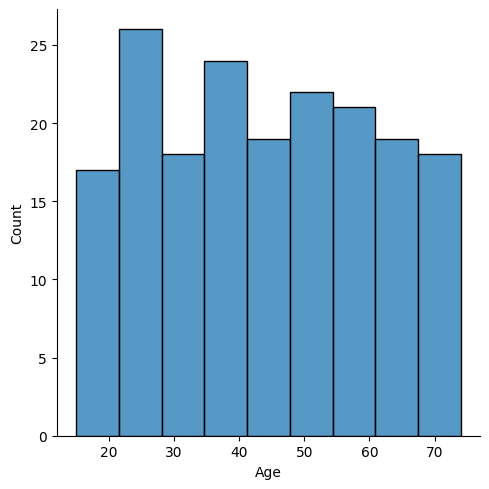

In [53]:
sns.displot(df['Age'])

<Axes: ylabel='Age'>

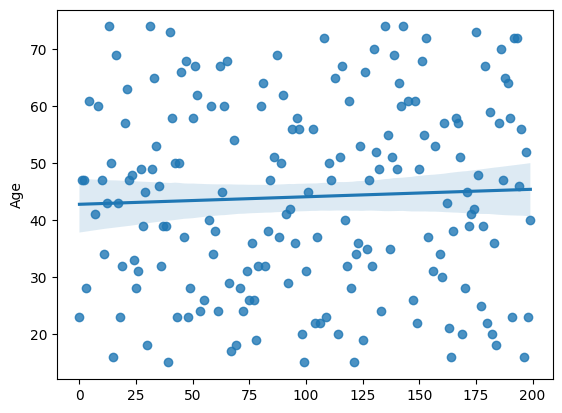

In [54]:
sns.regplot(x=df.index, y="Age", data=df)

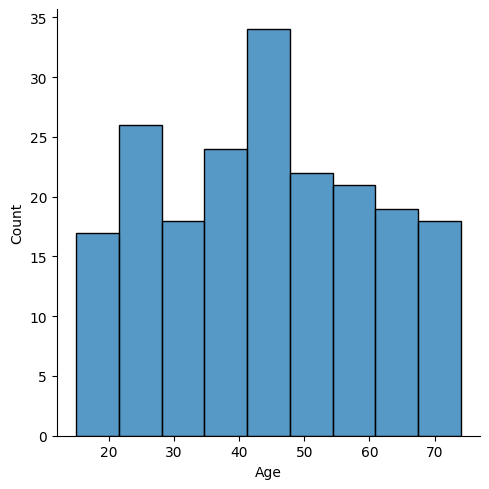

In [55]:
sns.displot(df['Age'].fillna(df['Age'].mean()))

In [56]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [57]:
df.isna().sum()

Age              0
Sex              0
BloodPressure    0
Cholesterol      0
Na/K             0
Drug             0
CausedDeath      0
dtype: int64

## Imputing with scikit-learn

In [58]:
from sklearn.impute import SimpleImputer

means_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') # for 'Age'
mfreq_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent') # for 'Sex'
const_imputer = SimpleImputer(missing_values=-1, strategy='constant', fill_value='no')  # for 'CausedDeath'

categorical = df_raw[['Sex', 'CausedDeath']]
categorical: pd.DataFrame = categorical.astype("category").aggregate(lambda c: c.cat.codes, axis=0)
print(categorical['Sex'].value_counts())
print(categorical['CausedDeath'].value_counts())

transformed_age = means_imputer.fit_transform(df_raw['Age'].values.reshape(1, -1))
transformed_sex = means_imputer.fit_transform(categorical['Sex'].values.reshape(1, -1))
transformed_cad = means_imputer.fit_transform(categorical['CausedDeath'].values.reshape(1, -1))

Sex
 2    99
 1    90
-1    10
 0     1
Name: count, dtype: int64
CausedDeath
 0    117
 1     58
-1     20
 2      3
 3      1
 4      1
Name: count, dtype: int64


/Users/tjest/Desktop/vscode/labs/tpnn/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:565: UserWarning: Skipping features without any observed values: [  5   6  54  56  70  73  85 102 107 112 134 144 146 155 158]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## Поиск, Замена и Удаление выбросов

In [59]:
df['Drug'].value_counts()

Drug
THC        90
Cocaine    54
LSD        23
Ecstasy    16
MDMA       16
Name: count, dtype: int64

<Axes: xlabel='Drug', ylabel='Age'>

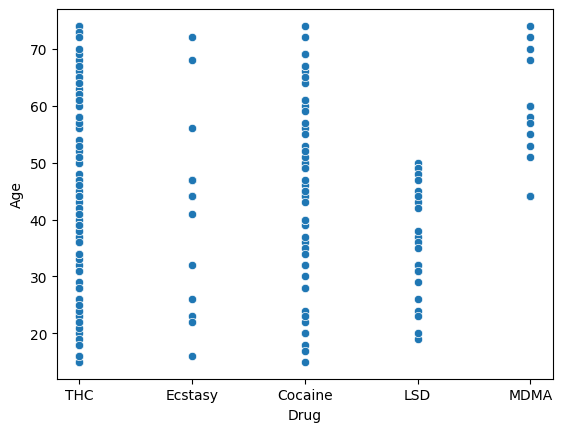

In [60]:
sns.scatterplot(x='Drug', y='Age', data=df)

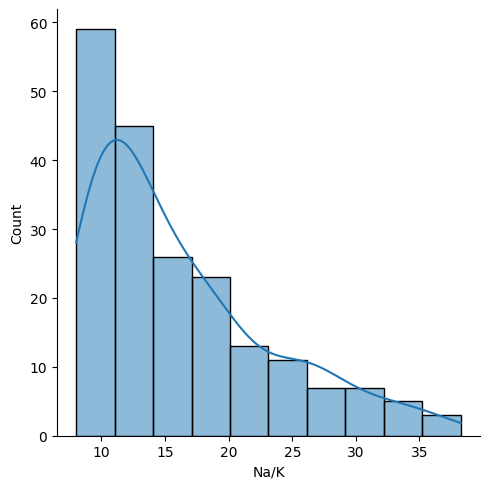

In [61]:
sns.displot(df['Na/K'], kde=True)

In [62]:
df[(df['Na/K'] <= 26) & (df['Na/K'] >= 24)]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.0,F,HIGH,HIGH,25.355,THC,no
19,32.0,F,HIGH,NORMAL,25.974,THC,no
21,63.0,M,NORMAL,HIGH,25.917,THC,yes
68,54.0,M,NORMAL,HIGH,24.658,THC,yes
69,18.0,F,HIGH,NORMAL,24.276,THC,no
97,56.0,F,HIGH,HIGH,25.395,THC,yes
119,61.0,F,HIGH,HIGH,25.475,THC,yes
125,19.0,F,HIGH,NORMAL,25.969,THC,no
133,24.0,M,NORMAL,HIGH,25.786,THC,no
141,64.0,F,LOW,NORMAL,25.741,THC,no


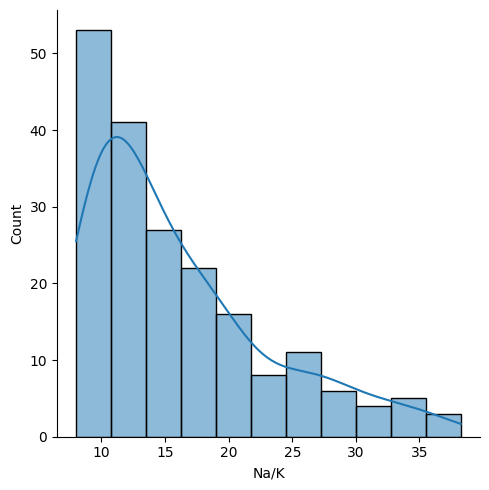

In [63]:
sns.displot(df.drop(index=[0, 119, 141])['Na/K'], kde=True)

In [64]:
df[(df['Na/K'] <= 29) & (df['Na/K'] >= 27)]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
52,62.0,M,LOW,NORMAL,27.183,THC,no
57,40.0,M,HIGH,HIGH,27.826,THC,no
65,68.0,F,NORMAL,NORMAL,27.050,THC,no
104,22.0,M,HIGH,NORMAL,28.294,THC,no
120,28.0,M,NORMAL,HIGH,27.064,THC,no
163,21.0,M,HIGH,NORMAL,28.632,THC,no


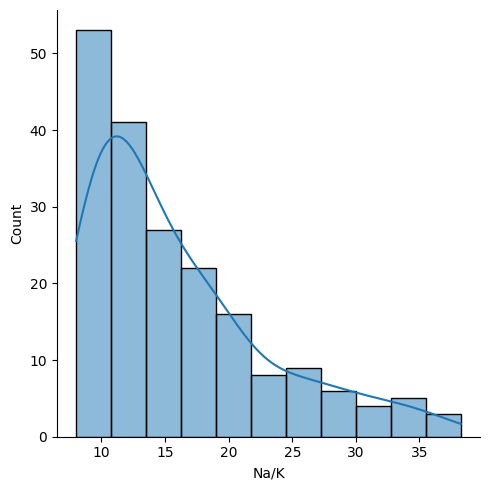

In [65]:
sns.displot(df.drop(index=[0, 119, 141, 52, 65])['Na/K'], kde=True)

## zscore
![alt text](./data/zscore.webp "zscore")

In [66]:
def remove_outliers_zscore(
    features: pd.DataFrame | pd.Series, zscore_thresh: float = 3.0, inplace: bool = False
) -> pd.DataFrame | pd.Series:
    numerics = features
    if isinstance(features, pd.DataFrame):
        numerics = features.select_dtypes(include=np.number)
    means = numerics.mean(axis=0)
    stds = numerics.std(axis=0)
    exclude = ((numerics - means) / stds).abs() >= zscore_thresh
    if isinstance(numerics, pd.DataFrame):
        exclude = exclude.any(axis=1)

    return features.drop(index=exclude[exclude].index, inplace=inplace)

print(df['Na/K'].shape)
print(remove_outliers_zscore(df['Na/K']).shape)

(199,)
(198,)


## ZScore with sklearn

In [67]:
from sklearn.preprocessing import StandardScaler

def remove_outliers_zscore_sklearn(series: pd.Series):
    scaler = StandardScaler()
    scaled: np.ndarray = scaler.fit_transform(series.values.reshape(1, -1))[0]
    exclude = abs(scaled) < 3.0

    return series[exclude]

## Fictional features

In [68]:
df[df['Na/K'].isna()]

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath


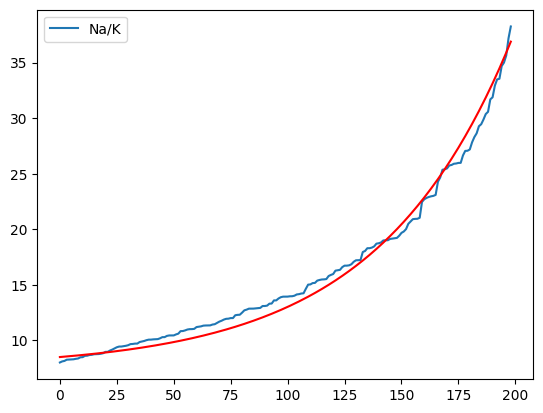

In [69]:
from matplotlib.lines import Line2D
empiric_function = Line2D(
    np.arange(df.shape[0]), 
    7.5+np.exp2(
        np.arange(df.shape[0], dtype=np.float32)/40.6), 
    color='red',
)
Na_to_K_sorted = df['Na/K'].sort_values().reset_index().drop(columns='index')
sns.lineplot(Na_to_K_sorted).add_line(empiric_function)

<Axes: >

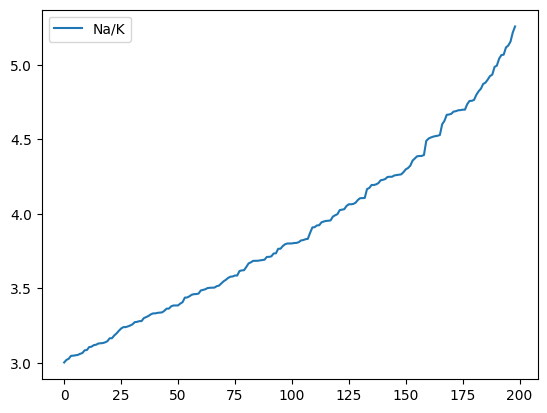

In [70]:
# f(x) = 7.5 + 2^(x/40.6)
# x = 7.5 + 2^(g(x)/40.6)
# x - 7.5 = 2^(g(x)/40.6)
# log2(x - 7.5) = g(x)/40.6
# g(x) = 40.6 * log2(x - 7.5)
sns.lineplot(np.log2(Na_to_K_sorted)) # pseudolinear
df["Na/K_linear"] = np.log2(df["Na/K"])

## Кодирование категориальных признаков

In [71]:
categorical = df[['Sex', 'CausedDeath', 'BloodPressure', 'Cholesterol', 'Drug']]
categorical: pd.DataFrame = categorical.astype("category").aggregate(lambda c: c.cat.codes, axis=0)
df[['Sex', 'CausedDeath', 'BloodPressure', 'Cholesterol', 'Drug']] = categorical
df.head(10)

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug,CausedDeath
0,23.000000,1,0,0,25.355,4,0
1,47.000000,2,1,0,13.093,1,0
2,47.000000,2,1,0,10.114,1,0
3,28.000000,1,2,0,8.798,0,0
4,61.000000,1,1,0,18.043,4,1
5,44.103261,1,2,0,8.607,0,0
6,44.103261,1,2,0,16.275,4,0
7,41.000000,2,1,0,11.037,1,0
8,60.000000,2,2,0,15.171,4,1
10,47.000000,1,1,0,11.767,1,0


In [72]:
from sklearn.preprocessing import LabelEncoder

## Дискретизация числовых признаков

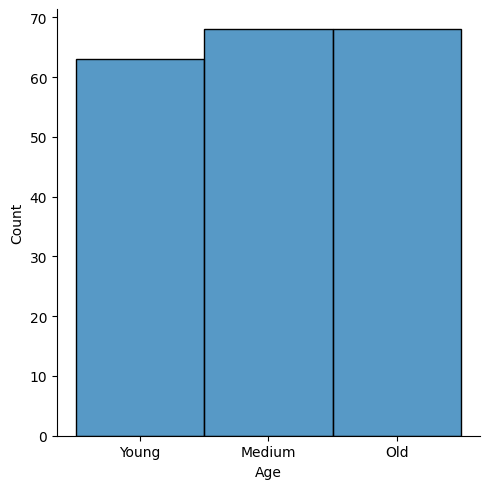

In [73]:
age_bins = pd.cut(
    x=df["Age"].astype(float), 
    bins=[0,35,50,float('inf')], 
    labels=["Young","Medium","Old"],
)
sns.displot(age_bins)
       

## Масшатбирование признаков

### MinMax масштабирование. Нормализация

![alt text](./data/minmax_all.png)

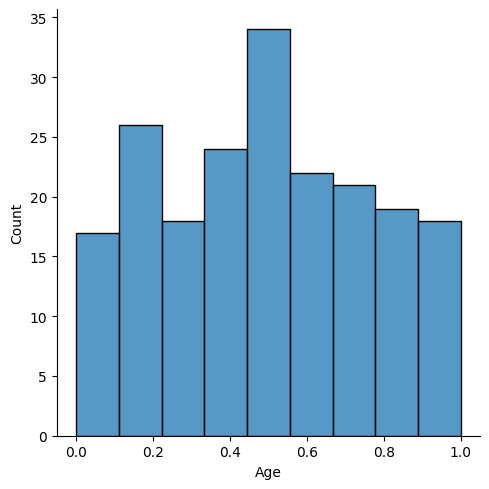

In [74]:
def scale_minmax(x: "pd.Series[np.number]") -> "pd.Series[float]":
    x_min = x.min()
    x_max = x.max()
    return (x - x_min) / (x_max - x_min)

age_minmax = scale_minmax(df['Age'])
sns.displot(age_minmax)

### Standard масштабирование. Стандартизация

![alt text](./data/standard.png)

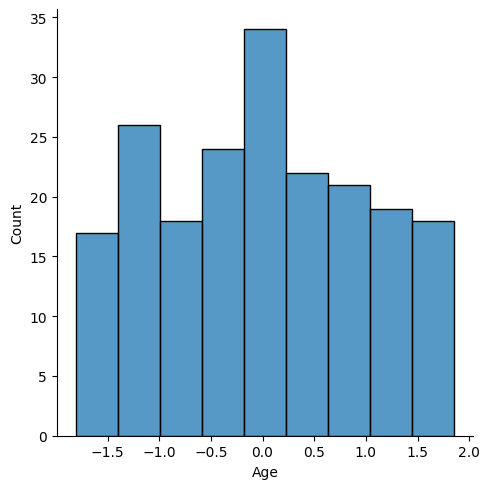

In [75]:
def scale_standard(x: "pd.Series[np.number]") -> "pd.Series[float]":
    μ = x.mean()
    σ = x.std()
    return (x - μ) / σ

age_standard = scale_standard(df['Age'])
sns.displot(age_standard)

In [76]:
df['Age'] = scale_minmax(df['Age'])
df['Na/K'] = scale_minmax(df['Na/K'])

## Поиск зависимостей

### Линейная зависимость, матрица корреляций и тепловая матрица

![alt text](./data/corr_coeff.jpg) ![alt text](./data/corr_matrix.jpg)

<Axes: >

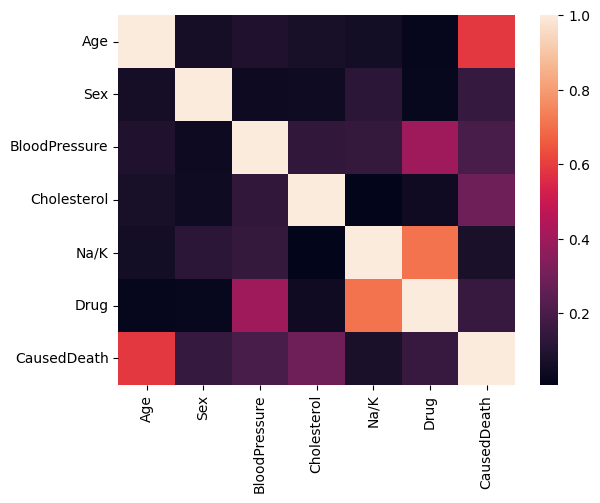

In [77]:
sns.heatmap(df.corr().abs())

In [78]:
df = df.drop(columns=['CausedDeath'])
df

,Age,Sex,BloodPressure,Cholesterol,Na/K,Drug
0,0.135593,1,0,0,0.573621,4
1,0.542373,2,1,0,0.168078,1
2,0.542373,2,1,0,0.069553,1
3,0.220339,1,2,0,0.026029,0
4,0.779661,1,1,0,0.331790,4
...,...,...,...,...,...,...
195,0.694915,1,1,0,0.117608,1
196,0.016949,2,1,0,0.132127,1
197,0.627119,2,2,0,0.062277,0
198,0.135593,2,2,1,0.198737,0


# Dataset Cleared